# Import libraries

In [1]:
import geopandas as gpd
import gspatial_plot as gsp
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Display all columns
import pandas as pd
pd.set_option('display.max_columns',None)

# Load Datasets

In [2]:
# Read
states = gpd.read_file("us_states.geojson")
fires = gpd.read_file("Monitoring_Trends_in_Burn_Severity _Fire_Occurrence_Locations_and_Burned_Area_Boundaries.geojson")
# Remove unnecessary states from the states dataset
states = states[
    ~states["NAME"].isin(
        [
            "Guam",
            "American Samoa",
            "Commonwealth of the Northern Mariana Islands",
            "Alaska",
            "Hawaii"
        ]
    )
]

# Question 1

In [3]:
# Spatial join to add state information to each fire occurrence
fires_with_states = gpd.sjoin(fires, states, how="inner", predicate="within")

# Question 2

In [4]:
# Print the state with the most number of fires
state_most_fires = fires_with_states["NAME"].value_counts().idxmax()
print("State with the most number fires:", state_most_fires)

State with the most number fires: Alabama


# Question 3

In [5]:
# Print the state with the least number of fires
state_least_fires = fires_with_states["NAME"].value_counts().idxmin()
print("State with the least number of fires:", state_least_fires)

State with the least number of fires: Pennsylvania


# Question 4

Correlation coefficient between number of fires and total water area: 0.7120638063621468


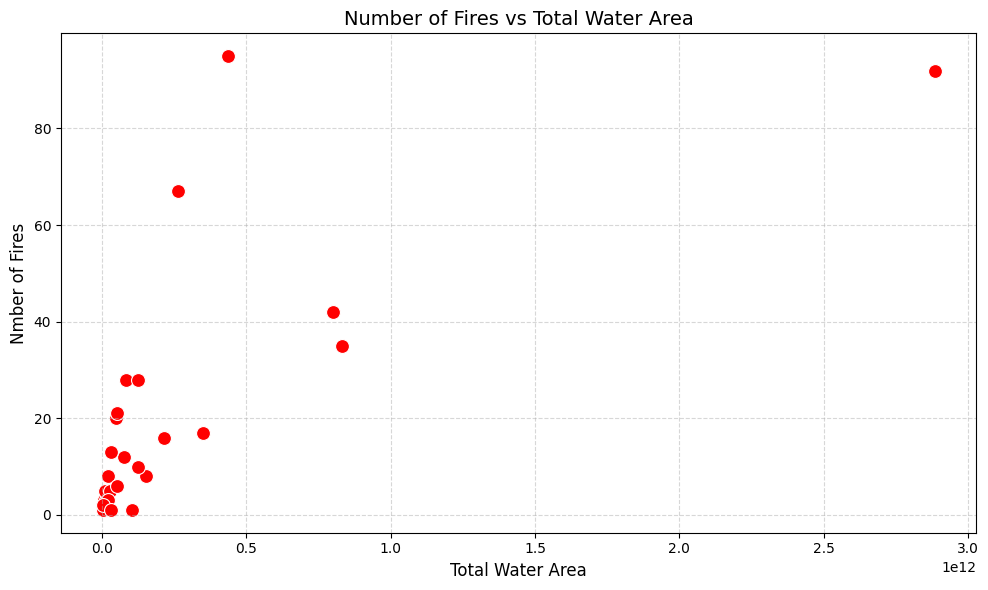

In [6]:
# Group by state and calculate the number fires and total water area
state_fire_water = fires_with_states.groupby("NAME").agg({"FIRE_ID": "count", "AWATER": "sum"})
# Calculate the correlation coefficient between the number of fires and total water area
correlation = state_fire_water["FIRE_ID"].corr(state_fire_water["AWATER"])
# Print the correlation coefficient
print("Correlation coefficient between number of fires and total water area:", correlation)
# Create a scatter plot of number of fires vs total water area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=state_fire_water, x="AWATER", y="FIRE_ID", s=100, color="red")
plt.xlabel("Total Water Area", fontsize=12)
plt.ylabel("Nmber of Fires", fontsize=12)
plt.title("Number of Fires vs Total Water Area", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Question 5

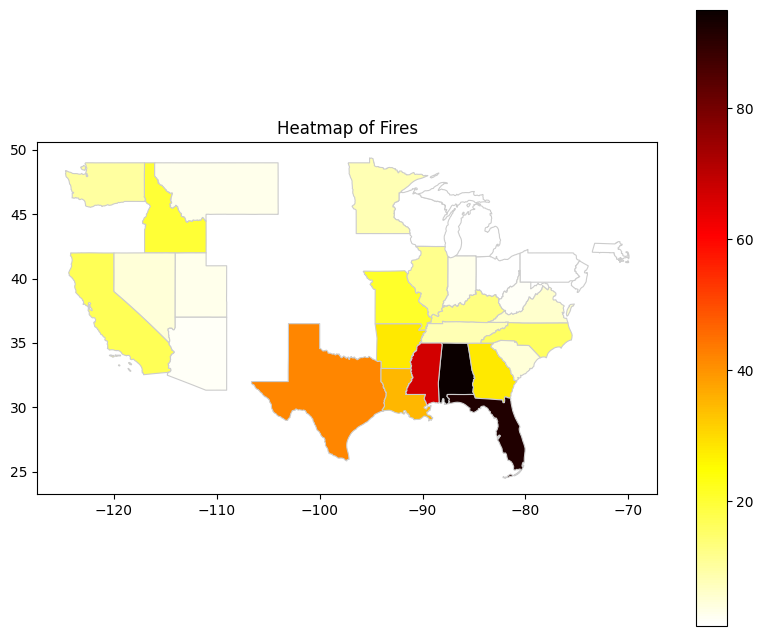

In [7]:
# Create a new column with a constant value to represent fire occurrences
fires_with_states["FIRE_OCCURRENCE"] = 1

# Group by state and calculate the sum of fire occurrences
state_fire_counts = fires_with_states.groupby("NAME")["FIRE_OCCURRENCE"].sum()

# merge the state fire counts with the states dataset
merged_data = states.merge(state_fire_counts, left_on="NAME", right_index=True)

# Plot he heatmap using the fire occurrence counts
fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column="FIRE_OCCURRENCE", cmap="hot_r", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Heatmap of Fires")
plt.show()

# Question 6

Axes(0.125,0.248809;0.775x0.492382)


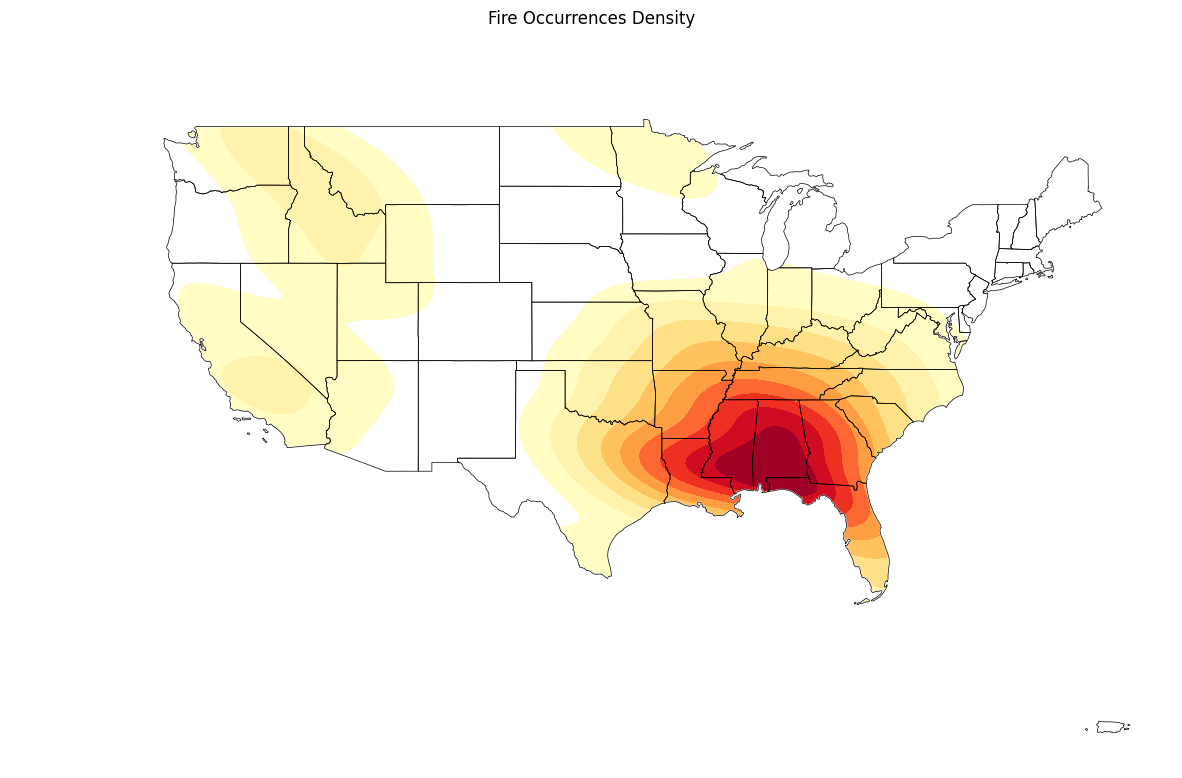

In [8]:
# plotting the density map of fire occurrences
ax = gsp.densityplot(fires, base=states, clip=True, clip_factor=1.2, cmap='YlOrRd', title='Fire Occurrences Density')

# Print the plot object and show the plot
print(ax)
gsp.plt.show()

# Question 7

In [9]:
# Find the state with the highest number of wildfres
state_highest_wildfires = fires_with_states.loc[fires_with_states["FIRE_TYPE"] == "Wildfire", "NAME"].value_counts().idxmax()
print("State with the highest number of wildfires:", state_highest_wildfires)

State with the highest number of wildfires: Idaho


# Question 8

In [10]:
# Find the state with the highest number of acres burned
state_highest_acres_burned = fires_with_states.groupby("NAME")["ACRES"].sum().idxmax()
print("State with the highest number of acres burned:", state_highest_acres_burned)

State with the highest number of acres burned: Florida


# Question 9

In [11]:
# Find the month with the highest number of fires
fires_with_states["MONTH"] = fires_with_states["IG_DATE"].dt.month
month_highest_fires = fires_with_states["MONTH"].value_counts().idxmax()
month_name = calendar.month_name[month_highest_fires]
print("Month with the highest number of fires:", month_name)

Month with the highest number of fires: March


# Question 10 

In [12]:
# Find the state with the highest number of fires for the month
state_highest_fires_month = fires_with_states.loc[fires_with_states["MONTH"] == month_highest_fires, "NAME"].value_counts().idxmax()
print("State with the highest number of fires for the month:", state_highest_fires_month)

State with the highest number of fires for the month: Mississippi
